**IMPORTANT** - running on the full Preston observatory uses about 12GB of memory as of 10/14/2019

In [2]:
import numpy as np
import pandas as pd
from enum import Enum

from nquads import NQuads
from prestongraph import *

### Get provenance log

On a large preston.acis.ufl.edu observatory it can take a while to run ```preston ls```, so we store its output at a temporary location
```shell
preston ls --remote http://preston.acis.ufl.edu > tmp/nquads
```

### Index the provenance logs

In [3]:
class Observatory:
    def __init__(self, name, dataPath=None, outputPath=None):
        self.name = name
        self.dataPath = dataPath
        self.index = None
        
        if outputPath is not None:
            self.outputPath = outputPath
        else:
            self.outputPath = "./" + name.lower().replace(" ", "-") + "-analysis/"

In [69]:
def MakeIndexFromLogs(paths):
    #import sys
    #import io
    global line
    global nQuad
    index = Index()

    if type(paths) == str:
        paths = [paths]
    #sys.stdin = io.FileIO(path)

    # Parse the provenance log into a list of n-quads
    for path in paths:
        with open(path) as file:
            parsingGenerations = False
            for line in file:
                nQuads = NQuads.Parse(str(line))
                for nQuad in nQuads:
                    if len(nQuad) < 3: # Only ingest well-formed n-quads
                        continue
                    elif not parsingGenerations:
                        if nQuad[1][0] == "http://www.w3.org/ns/prov#qualifiedGeneration":
                            parsingGenerations = True
                        elif nQuad[1][0] not in (
                            "http://www.w3.org/ns/prov#Activity",
                            "http://purl.org/dc/terms/description",
                            "http://www.w3.org/ns/prov#startedAtTime"
                        ):
                            continue
                    index.Ingest(nQuad)

    return index

In [ ]:
observatories = []

In [60]:
observatories.append(Observatory("iDigBio", "../zenodo_deeplinker/idigbio.nq"))

In [ ]:
observatories.append(Observatory("GBIF", "../zenodo_deeplinker/gbif.nq"))

In [115]:
observatories.append(Observatory("DataONE", "../zenodo_dataone/nquads"))

In [117]:
observatories.append(Observatory("BHL", "../zenodo_bhl/nquads"))

In [ ]:
# observatories.append(Observatory("Deeplinker", "../zenodo_deeplinker/nquads"))

In [1503]:
observatories.append(Observatory("All", [x.dataPath for x in observatories]))

In [1504]:
%%time

import os

for observatory in observatories:
    if observatory.index is not None:
        print("Skipping %s; already loaded" % observatory.name)
        continue

    # Prepare a place to store results
    try:
        os.mkdir(observatory.outputPath)
    except OSError:
        pass
    
    # Make an index
    if observatory.dataPath is None:
        print("Skipping %s; data path not specified" % observatory.name)
    else:
        print("Reading %s..." % observatory.name)
        %time observatory.index = MakeIndexFromLogs(observatory.dataPath)
        print("Done reading %s\n" % observatory.name)

Skipping iDigBio; already loaded
Skipping GBIF; already loaded
Skipping DataONE; already loaded
Skipping BHL; already loaded
Reading All...
CPU times: user 15min 12s, sys: 17min 37s, total: 32min 49s
Wall time: 32min 49s
Done reading All

CPU times: user 15min 12s, sys: 17min 37s, total: 32min 49s
Wall time: 32min 49s


In [1505]:
includeLegend = False
includeTitle = False
figureDpi = 300

In [1506]:
observatory = observatories[4]
observatoryName = observatory.name
fullIndex = observatory.index
outputPath = observatory.outputPath
dataPath = observatory.dataPath
print("Using %s" % observatoryName)

Using All


In [1507]:
for x in fullIndex.verbLookup["http://www.w3.org/ns/prov#startedAtTime"].triples: print(x)

97892995-268b-4ab7-8d05-e015511075eb	http://www.w3.org/ns/prov#startedAtTime	2019-09-01T15:07:03.524Z
b34ce2a0-ec51-4fd5-a67a-990d6c08bca5	http://www.w3.org/ns/prov#startedAtTime	2018-12-04T01:25:48.721Z
a0c36b74-4c95-4a7d-9cf1-994b3bc16961	http://www.w3.org/ns/prov#startedAtTime	2019-02-13T08:55:08.176Z
7fe26593-d48d-4c4c-93f2-79885231e36f	http://www.w3.org/ns/prov#startedAtTime	2019-02-08T00:17:15.510Z
044dea8b-0169-4751-9f61-82f53aa2dbbf	http://www.w3.org/ns/prov#startedAtTime	2018-11-13T15:13:01.286Z
01b33c3e-d4ed-429d-937e-5921e088a151	http://www.w3.org/ns/prov#startedAtTime	2019-07-01T21:41:36.023Z
d8afa467-0bd4-4fa8-b618-2944e96bb7d0	http://www.w3.org/ns/prov#startedAtTime	2019-09-01T09:06:39.430Z
f3cfd1e7-2b32-4b28-8c6b-607dccffa636	http://www.w3.org/ns/prov#startedAtTime	2019-08-01T11:59:32.756Z
501dadd3-0468-4a12-b6a9-1cd6c228be70	http://www.w3.org/ns/prov#startedAtTime	2019-09-01T09:34:33.505Z
39f5fc0f-9dd7-4413-8e34-5a2a7fceb712	http://www.w3.org/ns/prov#startedAtTime	2019-

In [1508]:
print("{:,}".format(len(fullIndex.nodes)), "nodes")

8,084,758 nodes


In [1509]:
# formats = set()

# for x in fullIndex.verbLookup["http://purl.org/dc/elements/1.1/format"].triples:
#     formats.add(x.object)

# for x in formats: print(x)

In [1510]:
for x in fullIndex.verbs: print(x)

http://www.w3.org/ns/prov#generatedAtTime
http://www.w3.org/ns/prov#wasStartedBy
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://purl.org/pav/createdBy
http://www.w3.org/ns/prov#activity
http://purl.org/dc/terms/bibliographicCitation
http://www.w3.org/ns/prov#qualifiedGeneration
http://purl.org/pav/hasVersion
http://www.w3.org/ns/prov#used
http://www.w3.org/ns/prov#hadMember
http://purl.org/dc/elements/1.1/format
http://www.w3.org/ns/prov#wasAssociatedWith
http://www.w3.org/ns/prov#usedBy
http://www.w3.org/1999/02/22-rdf-syntax-ns#seeAlso
http://www.w3.org/ns/prov#wasGeneratedBy
http://purl.org/dc/terms/description
http://www.w3.org/ns/prov#startedAtTime


In [1511]:
def PrintNodeSubTree(node, maxDepth=1, root=True):
    if root:
        for x in node.inwardTriples:
            print(x)

    if maxDepth > 0:
        for x in node.outwardTriples:
            print(x)
            PrintNodeSubTree(x.object, maxDepth - 1, False)

def Peek(nativeSet):
    if len(nativeSet) == 0:
        return None
    else:
        item = nativeSet.pop()
        nativeSet.add(item)
        return item

def ContentIsMissing(content):
    return str(content).startswith("http")

### Get crawl UUIDs and sort them by date

In [1512]:
class CrawlMeta:
    def __init__(self, position, date):
        # Properties
        self.position = position
        self.date = date

In [1514]:
checkDescription = ("http://purl.org/dc/terms/description" in fullIndex.verbLookup)
startDate = "2019-03-01"
endDate = "2019-10-1"

crawlDates = []
for triple in fullIndex.verbLookup["http://www.w3.org/ns/prov#startedAtTime"].triples:
    crawlUuid = triple.subject
    crawlDate = triple.object

    if crawlDate < startDate:
        print("Ignoring early crawl log %s (\"%s\")" % (str(crawlUuid), str(crawlDate)))
    else:
        if checkDescription:
            descriptionTriple = Peek(crawlUuid.outwardTriples & fullIndex.verbLookup["http://purl.org/dc/terms/description"].triples)
            if descriptionTriple is None or descriptionTriple.object == "A crawl event that discovers biodiversity archives.":
                crawlDates.append((crawlUuid, crawlDate))
            else:
                print("Ignoring non-crawl log %s (\"%s\")" % (str(crawlUuid), str(descriptionTriple.object)))
        else:
            crawlDates.append((crawlUuid, crawlDate))
numCrawls = len(crawlDates)

crawlDates.sort(key=lambda x: x[1])

print()
# Assign some helpful metadata to each crawl
crawlMetaLookup = dict()
for i, crawlDate in enumerate(crawlDates):
    # Tag crawl nodes with their chronological position in the preston history
    crawlMeta = CrawlMeta(
        position=i,
        date=crawlDate[1]
    )

    crawlMetaLookup[crawlDate[0]] = crawlMeta

    print("%s\t%s\t%d" % (crawlDate[0], crawlMeta.date, crawlMeta.position))

Ignoring early crawl log b34ce2a0-ec51-4fd5-a67a-990d6c08bca5 ("2018-12-04T01:25:48.721Z")
Ignoring early crawl log a0c36b74-4c95-4a7d-9cf1-994b3bc16961 ("2019-02-13T08:55:08.176Z")
Ignoring early crawl log 7fe26593-d48d-4c4c-93f2-79885231e36f ("2019-02-08T00:17:15.510Z")
Ignoring early crawl log 044dea8b-0169-4751-9f61-82f53aa2dbbf ("2018-11-13T15:13:01.286Z")
Ignoring non-crawl log 77b671d1-525c-4258-8e2e-8d50f295ef6e ("An event that (re-) processes existing biodiversity datasets graphs and their provenance.")
Ignoring non-crawl log 21014813-c4f0-48cd-9046-e7d55e7702da ("An event that (re-) processes existing biodiversity datasets graphs and their provenance.")
Ignoring early crawl log b6a73da4-25f4-4829-bc0f-886f65b7e496 ("2018-10-17T22:42:41.609Z")

93dfc861-dfa3-4556-b50b-0b1c50ea8d49	2019-03-01T20:37:34.877Z	0
fd271e0a-ed05-4805-81ae-7ad6dba9b52a	2019-03-13T07:55:12.903Z	1
074aaf35-30b6-4597-9b53-d250bf8ff5ed	2019-03-31T23:33:18.478Z	2
7415c514-572d-4b26-8a95-1133cc77a194	2019-04

### Build a history for each URL

In [1515]:
class Status(Enum):
    UNKNOWN             = 0    # Did not check for content
    FIRST_CONTENT       = 1    # Returned content for the first time
    SAME_CONTENT        = 2    # Returned the same content as the last successful query
    CHANGED_CONTENT     = 3    # Returned new content
    OLD_CONTENT         = 4    # Returned previously seen content that is different from the previous successful data
    BECAME_UNRESOLVED   = 5    # Failed to return content after a successful query
    STILL_UNRESOLVED    = 6    # Failed to return content again
    ERROR               = 7    # Returned malformed content

class UrlLifetime:
    def __init__(self, numCrawls):
        self.statuses = [Status.UNKNOWN] * numCrawls
        self.contents = [None] * numCrawls

        self.firstCrawlPosition = None
        self.lastCrawlPosition = None
        self.lastKnownStatus = Status.UNKNOWN
        self.firstChangePosition = None
        self.firstBreakPosition = None

        self.numResolves = 0
        self.numBreaks = 0
        self.numContents = 0
        self.numContentChanges = 0

class ContentLifetime:
    def __init__(self, numCrawls):
        self.firstCrawlPosition = None
        self.lastCrawlPosition = None

### Collect the contents seen over the course of each URL's lifetime

In [1516]:
%%time

numGenerationsIgnored = 0

contentLifetimes = dict()
urlLifetimes = dict()
for x in fullIndex.verbLookup["http://www.w3.org/ns/prov#qualifiedGeneration"].triples:
    qualGen = x.object

    # Get content
    contentTriple = Peek(qualGen.inwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#qualifiedGeneration"].triples)
    content = contentTriple.subject

    # Get URL
    urlTriple = Peek(qualGen.outwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#used"].triples)
    url = urlTriple.object

    # Get crawl
    crawlTriple = Peek(qualGen.outwardTriples & fullIndex.verbLookup["http://www.w3.org/ns/prov#activity"].triples)
    crawl = crawlTriple.object
    
    # Skip generations from ignored crawls
    if crawl not in crawlMetaLookup:
        numGenerationsIgnored += 1
        continue

    crawlMeta = crawlMetaLookup[crawl]

    # Fill in URL lifetime data
    if url in urlLifetimes:
        lifetime = urlLifetimes[url]
    else:
        lifetime = UrlLifetime(numCrawls)
        urlLifetimes[url] = lifetime

    if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
        lifetime.firstCrawlPosition = crawlMeta.position

    if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
        lifetime.lastCrawlPosition = crawlMeta.position

    lifetime.contents[crawlMeta.position] = content
    
    # Fill in content lifetime data
    if not ContentIsMissing(content):
        if content in contentLifetimes:
            lifetime = contentLifetimes[content]
        else:
            lifetime = ContentLifetime(numCrawls)
            contentLifetimes[content] = lifetime
        
        if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
            lifetime.firstCrawlPosition = crawlMeta.position

        if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
            lifetime.lastCrawlPosition = crawlMeta.position

CPU times: user 1min 3s, sys: 1min 38s, total: 2min 41s
Wall time: 2min 41s


In [1517]:
totalNumUrls = len(urlLifetimes)
print("{:,}".format(numGenerationsIgnored), "generations ignored")
print("{:,}".format(totalNumUrls), "urls processed")

1,401,514 generations ignored
693,511 urls processed


### Assign a status for each stage of each URL's lifetime

There's some ambiguity in the status of a URL's first query; we make some arbitrary, totally unfounded assumptions:
* If unresolved, consider it BECAME_UNRESOLVED rather than STILL_UNRESOLVED
* If resolved, consider it FIRST_CONTENT rather than SAME_CONTENT, OLD_CONTENT, or CHANGED_CONTENT

In [1518]:
%%time

for url, lifetime in urlLifetimes.items():
    wasAlive = True
    mostRecentContent = None
    for i, content in enumerate(lifetime.contents):

        if content:
            if ContentIsMissing(content):
        # Became unresolved
                if wasAlive:
                    status = Status.BECAME_UNRESOLVED
                    lifetime.numBreaks += 1

        # Still unresolved
                else:
                    status = Status.STILL_UNRESOLVED

                wasAlive = False
            
                if lifetime.firstBreakPosition is None:
                    lifetime.firstBreakPosition = i

        # First content
            else:
                if mostRecentContent == None:
                    status = Status.FIRST_CONTENT
                    mostRecentContent = content
                    lifetime.numContents += 1

        # Same content
                elif content == mostRecentContent:
                    status = Status.SAME_CONTENT

                else:
        # Old content
                    if content in lifetime.contents[0:i]:
                        status = Status.OLD_CONTENT

        # Changed content
                    else:
                        status = Status.CHANGED_CONTENT
                        if lifetime.firstChangePosition is None:
                            lifetime.firstChangePosition = i
                        lifetime.numContents += 1

                    mostRecentContent = content
                    lifetime.numContentChanges += 1

                wasAlive = True
                lifetime.numResolves += 1

            lifetime.lastKnownStatus = status
        # Unknown
        else:
            status = Status.UNKNOWN

        lifetime.statuses[i] = status

CPU times: user 10.2 s, sys: 0 ns, total: 10.2 s
Wall time: 10.2 s


In [1519]:
textUrlLifetimes = dict()
for url, lifetime in urlLifetimes.items():
    textContents = [None] * numCrawls
    for i, content in enumerate(lifetime.contents):
        textContents[i] = str(content)
    textUrlLifetimes[str(url)] = textContents

np.save(outputPath + "url-lifetimes", textUrlLifetimes)

In [1520]:
print("Lifetime for %s\n" % url)
print("\n".join(["%d:\t%s\t%s" % (i, lifetime.statuses[i], lifetime.contents[i]) for i in range(numCrawls)]))

Lifetime for https://cn.dataone.org/cn/v2/resolve/https%3A%2F%2Fpasta.lternet.edu%2Fpackage%2Fmetadata%2Feml%2Fknb-lter-bnz%2F16%2F18

0:	Status.UNKNOWN	None
1:	Status.FIRST_CONTENT	hash://sha256/6091fa9bcf100665027925222b814a4219e2c9526d11aa187fa9424f9afa2f2b
2:	Status.UNKNOWN	None
3:	Status.UNKNOWN	None
4:	Status.UNKNOWN	None
5:	Status.UNKNOWN	None
6:	Status.UNKNOWN	None
7:	Status.UNKNOWN	None
8:	Status.UNKNOWN	None
9:	Status.UNKNOWN	None
10:	Status.UNKNOWN	None
11:	Status.UNKNOWN	None
12:	Status.UNKNOWN	None
13:	Status.UNKNOWN	None
14:	Status.UNKNOWN	None
15:	Status.UNKNOWN	None
16:	Status.UNKNOWN	None
17:	Status.UNKNOWN	None
18:	Status.UNKNOWN	None
19:	Status.UNKNOWN	None
20:	Status.UNKNOWN	None
21:	Status.UNKNOWN	None


## Build figures
These should probably be colorless (i.e. use black and white textures and dotted lines)

### New, modified, lost content per crawl

In [1521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from itertools import cycle, islice

%matplotlib inline

In [1522]:
%%time

crawlStatusTotals = [(dict([(status, 0) for status in Status])) for crawlDate in crawlDates]
# for crawl in range(numCrawls):
#     crawlStatusTotals[crawl] = 

# crawlStatusTotals = dict()


for _, lifetime in urlLifetimes.items():
    for i, status in enumerate(lifetime.statuses):
        crawlStatusTotals[i][status] += 1

# crawl_status_totals_df = pd.DataFrame(
#     index   = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
#     columns = [x for x in Status],
#     data    = ,
#     dtype   = int
# )

crawl_status_totals_df = pd.DataFrame(
    index = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
    data = crawlStatusTotals
)

CPU times: user 6.05 s, sys: 0 ns, total: 6.05 s
Wall time: 6.05 s


In [1523]:
crawl_status_totals_df.to_csv(outputPath + "crawl-status-totals-df")
crawl_status_totals_df.transpose()

,2019-03-01 20:37:34.877000,2019-03-13 07:55:12.903000,2019-03-31 23:33:18.478000,2019-04-29 19:11:30.720000,2019-05-01 03:57:18.530000,2019-05-13 17:10:37.661000,2019-05-14 20:26:29.383000,2019-06-01 00:36:19.222000,2019-06-01 07:32:31.022000,2019-06-01 10:43:38.196000,...,2019-07-01 21:41:36.023000,2019-08-01 02:27:40.507000,2019-08-01 04:21:24.356000,2019-08-01 11:59:32.756000,2019-09-01 09:06:39.430000,2019-09-01 09:34:33.505000,2019-09-01 15:07:03.524000,2019-10-01 01:29:29.672000,2019-10-01 11:40:13.365000,2019-10-01 13:00:09.644000
Status.UNKNOWN,676856,348727,641509,640161,640714,451008,378821,451008,671444,640207,...,639673,648571,352278,448502,448501,640294,351899,554657,445333,639590
Status.FIRST_CONTENT,15771,340496,20641,1410,15478,227043,3533,33,0,733,...,684,709,19468,561,1,549,964,8,3443,1088
Status.SAME_CONTENT,0,0,13697,50869,26848,0,294265,184882,21332,39801,...,42744,40025,308045,228952,153437,42020,325172,127993,229513,19880
Status.CHANGED_CONTENT,0,0,1829,441,8986,0,6417,1,606,9061,...,8954,2945,5042,43,9,9251,9169,2435,12,31221
Status.OLD_CONTENT,0,0,0,0,0,0,1,0,54,1,...,27,0,1732,0,0,2,883,708,0,0
Status.BECAME_UNRESOLVED,884,4288,15202,236,373,15460,7866,42160,2,2283,...,56,254,3428,67,76134,41,816,4724,77,640
Status.STILL_UNRESOLVED,0,0,633,394,1112,0,2608,15427,73,1425,...,1373,1007,3518,15386,15429,1354,4608,2986,15133,1092
Status.ERROR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1524]:
col_hex = {
    "blue"      : "#1f77b4",
    "orange"    : "#ff7f0e",
    "green"     : "#2ca02c",
    "red"       : "#d62728",
    "purple"    : "#9467bd",
    "brown"     : "#8c564b",
    "pink"      : "#e377c2",
    "gray"      : "#7f7f7f",
    "yellow"    : "#bcbd22",
    "teal"      : "#17becf",
    
    "bright green"  : "#00ff00",
    "bright red"    : "#ff0000",
    "green yellow"  : "#9ACD32",
    "olive"         : "#808000"
}

fig_df = crawl_status_totals_df[[
    Status.SAME_CONTENT,
    Status.FIRST_CONTENT,
    Status.OLD_CONTENT,
    Status.CHANGED_CONTENT,
    Status.STILL_UNRESOLVED,
    Status.BECAME_UNRESOLVED,
    Status.UNKNOWN,
    Status.ERROR
]]

status_colors = {
    Status.UNKNOWN             : "gray",
    Status.FIRST_CONTENT       : "bright green",
    Status.SAME_CONTENT        : "green",
    Status.CHANGED_CONTENT     : "yellow",
    Status.OLD_CONTENT         : "olive",
    Status.BECAME_UNRESOLVED   : "bright red",
    Status.STILL_UNRESOLVED    : "red",
    Status.ERROR               : "purple",
}

status_color_map = list(islice(cycle([col_hex[status_colors[x]] for x in fig_df.columns]), None, 256))

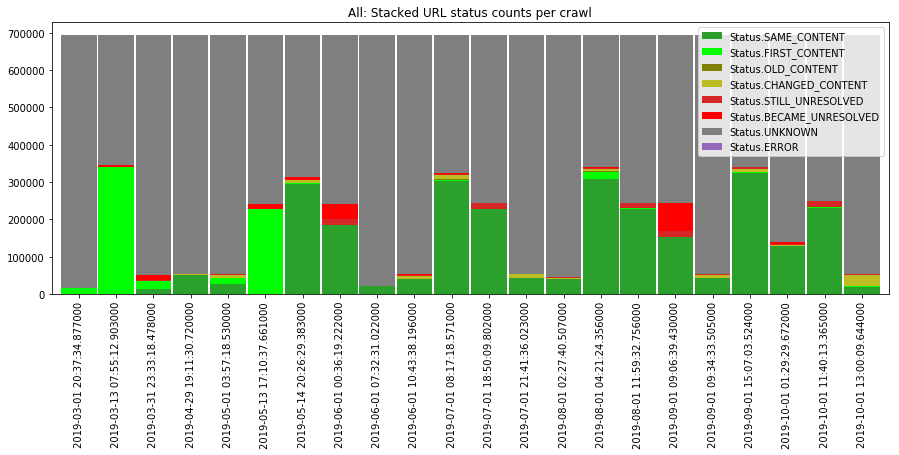

In [1525]:
figureTitle = observatoryName + ": Stacked URL status counts per crawl"
outputFile = outputPath + "stacked-query-status-counts-per-crawl"

ax = fig_df.plot(
    kind="bar",
    stacked=True,
    width=.95,
    color=status_color_map,
    figsize=(15, 5),
    legend=False
);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

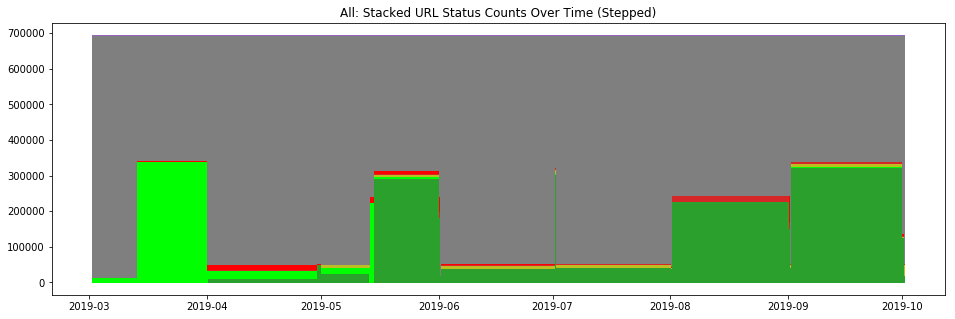

In [1526]:
figureTitle = observatoryName + ": Stacked URL Status Counts Over Time (Stepped)"
outputFile = outputPath + "stacked-query-status-counts-over-time"

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111)

# Fill in space between lines
x = fig_df.index.append(pd.Index([datetime.datetime.now()]))
y1 = pd.Series({ q : 0 for q in x })

columns = fig_df.columns
n = len(columns)
for i in range(0, n):
    y2 = y1 + fig_df[columns[i]] + 0
    ax.fill_between(x, y1, y2, step="post", color=status_color_map[i])
    y1 = y2

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

In [1527]:
crawl_status_totals_df

,Status.UNKNOWN,Status.FIRST_CONTENT,Status.SAME_CONTENT,Status.CHANGED_CONTENT,Status.OLD_CONTENT,Status.BECAME_UNRESOLVED,Status.STILL_UNRESOLVED,Status.ERROR
2019-03-01 20:37:34.877,676856,15771,0,0,0,884,0,0
2019-03-13 07:55:12.903,348727,340496,0,0,0,4288,0,0
2019-03-31 23:33:18.478,641509,20641,13697,1829,0,15202,633,0
2019-04-29 19:11:30.720,640161,1410,50869,441,0,236,394,0
2019-05-01 03:57:18.530,640714,15478,26848,8986,0,373,1112,0
2019-05-13 17:10:37.661,451008,227043,0,0,0,15460,0,0
2019-05-14 20:26:29.383,378821,3533,294265,6417,1,7866,2608,0
2019-06-01 00:36:19.222,451008,33,184882,1,0,42160,15427,0
2019-06-01 07:32:31.022,671444,0,21332,606,54,2,73,0
2019-06-01 10:43:38.196,640207,733,39801,9061,1,2283,1425,0


In [1528]:
crawl_health_df = pd.DataFrame(index=crawl_status_totals_df.index)

crawl_health_df["Available URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df["Stable URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df

,Available URLs,Stable URLs
2019-03-01 20:37:34.877,15771,15771
2019-03-13 07:55:12.903,340496,340496
2019-03-31 23:33:18.478,36167,36167
2019-04-29 19:11:30.720,52720,52720
2019-05-01 03:57:18.530,51312,51312
2019-05-13 17:10:37.661,227043,227043
2019-05-14 20:26:29.383,304216,304216
2019-06-01 00:36:19.222,184916,184916
2019-06-01 07:32:31.022,21992,21992
2019-06-01 10:43:38.196,49596,49596


## Running URL and content totals

In [1529]:
%%time

crawlUrlTotals = [0] * numCrawls
crawlDatasetTotals = [0] * numCrawls
crawlAbandonedTotals = [0] * numCrawls
crawlFirstBreakTotals = [0] * numCrawls
crawlFirstChangeTotals = [0] * numCrawls
crawlFirstUnreliableTotals = [0] * numCrawls

numUnavailable = 0
numVeryAvailable = 0
numVeryStable = 0
numVeryReliable = 0
numAbandoned = 0

totalNumResolves = 0
totalNumBreaks = 0
totalNumContents = 0
totalNumContentChanges = 0
maxNumContentChanges = 0

maxNumBreaks   = totalNumUrls * (np.ceil(numCrawls / 2)) # Round up; if the availability is [0, 1, 0] across three crawls, there are at most two breaks
maxNumContents = totalNumUrls * (numCrawls)

breakCounts = []
contentChangeCounts = []

for _, lifetime in urlLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlUrlTotals[lifetime.firstCrawlPosition] += 1

    totalNumResolves += lifetime.numResolves
    totalNumBreaks += lifetime.numBreaks
    totalNumContents += lifetime.numContents
    totalNumContentChanges += lifetime.numContentChanges
    maxNumContentChanges += lifetime.numResolves - 1

    breakCounts.append(lifetime.numBreaks)
    contentChangeCounts.append(lifetime.numContentChanges)

    if lifetime.numBreaks == 0:
        numVeryAvailable += 1

    if lifetime.numContents == 1:
        numVeryStable += 1

    if lifetime.numBreaks == 0 and lifetime.numContents == 1:
        numVeryReliable += 1

    if lifetime.lastKnownStatus in (Status.BECAME_UNRESOLVED, Status.STILL_UNRESOLVED):
        numUnavailable += 1

    firstUnreliable = numCrawls
    if lifetime.firstBreakPosition is not None:
        crawlFirstBreakTotals[lifetime.firstBreakPosition] += 1
        firstUnreliable = lifetime.firstBreakPosition

    if lifetime.firstChangePosition is not None:
        crawlFirstChangeTotals[lifetime.firstChangePosition] += 1
        firstUnreliable = min(lifetime.firstChangePosition, firstUnreliable)
    
    if firstUnreliable < numCrawls:
        crawlFirstUnreliableTotals[firstUnreliable] += 1

    # If the URL stopped being queried, find out when
    for i, status in enumerate(lifetime.statuses[::-1]):
        if status != Status.UNKNOWN:
            break

    if i > 0:
        crawlAbandonedTotals[numCrawls - i] += 1
        numAbandoned += 1

for _, lifetime in contentLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlDatasetTotals[lifetime.firstCrawlPosition] += 1

reallyBads = list()
for url, lifetime in urlLifetimes.items():
    skip = False
    for status in lifetime.statuses:
        if status not in (Status.BECAME_UNRESOLVED, Status.STILL_UNRESOLVED, Status.UNKNOWN):
            skip = True
            break
    if not skip:
        reallyBads.append((url, lifetime))

numReallyBads = len(reallyBads)

numUnreliable = totalNumUrls - numVeryReliable
numUnstable = totalNumUrls - numVeryStable
numUnavailable = totalNumUrls - numVeryAvailable

np.save(outputPath + "totals", {
    "totalNumUrls" : totalNumUrls,
    "totalNumResolves" : totalNumResolves,
    "totalNumBreaks" : totalNumBreaks,
    "totalNumContents" : totalNumContents,
    "totalNumContentChanges" : totalNumContentChanges,
    "maxNumContentChanges" : maxNumContentChanges,
    "numReallyBads" : numReallyBads,
    "numUnreliable" : numUnreliable,
    "numUnstable" : numUnstable,
    "numUnavailable" : numUnavailable,
})

CPU times: user 3.33 s, sys: 125 ms, total: 3.45 s
Wall time: 3.46 s


In [1530]:
textReport = ""

# Totals
textReport += ("Of all %s observed URLs,\n"
    % ("{0:,}".format(totalNumUrls)))
textReport += ("\t%s of URLs (%s total) were very available\n"
    % ("{0:.2%}".format(numVeryAvailable / totalNumUrls), "{0:,}".format(numVeryAvailable)))
textReport += ("\t%s of URLs (%s total) were very stable\n"
    % ("{0:.2%}".format(numVeryStable / totalNumUrls), "{0:,}".format(numVeryStable)))
textReport += ("\t%s of URLs (%s total) were very reliable (both available and stable)\n"
    % ("{0:.2%}".format(numVeryReliable / totalNumUrls), "{0:,}".format(numVeryReliable)))
textReport += ("\t%s of URLs (%s total) were unresolved in the last crawl\n"
    % ("{0:.2%}".format(numUnavailable / totalNumUrls), "{0:,}".format(numUnavailable)))
textReport += ("\t%s of URLs (%s total) never resolved in any crawl\n"
    % ("{0:.2%}".format(numReallyBads / totalNumUrls), "{0:,}".format(numReallyBads)))
textReport += ("\t%s of URLs (%s total) were abandoned\n"
    % ("{0:.2%}".format(numAbandoned / totalNumUrls), "{0:,}".format(numAbandoned)))

# Unreliable URLs
textReport += "\n"
textReport += ("Of the %s unreliable URLs,\n"
    % ("{0:,}".format(numUnreliable)))
textReport += ("\t%s of unreliable URLs (%s total) were not always available\n"
    % ("{0:.2%}".format(numUnavailable / numUnreliable), "{0:,}".format(numUnavailable)))
textReport += ("\t%s of unreliable URLs (%s total) were not always stable\n"
    % ("{0:.2%}".format(numUnstable / numUnreliable), "{0:,}".format(numUnstable)))

# Behavior
textReport += "\n"
textReport += ("URLs break %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumBreaks / (totalNumResolves + totalNumBreaks))))
textReport += ("URLs contents change %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumContentChanges / maxNumContentChanges)))

file = open(outputPath + "report.txt", "w+")
file.write(textReport)
file.close()

print(textReport)

Of all 693,511 observed URLs,
	78.97% of URLs (547,680 total) were very available
	85.58% of URLs (593,478 total) were very stable
	69.96% of URLs (485,205 total) were very reliable (both available and stable)
	21.03% of URLs (145,831 total) were unresolved in the last crawl
	5.22% of URLs (36,222 total) never resolved in any crawl
	92.22% of URLs (639,590 total) were abandoned

Of the 208,306 unreliable URLs,
	70.01% of unreliable URLs (145,831 total) were not always available
	48.02% of unreliable URLs (100,033 total) were not always stable

URLs break 4.87% of the time between queries
URLs contents change 4.09% of the time between queries



In [1531]:
breakCountFrequencies = np.unique(breakCounts, return_counts=True)
np.save(outputPath + "url-break-frequencies.npy", breakCountFrequencies)

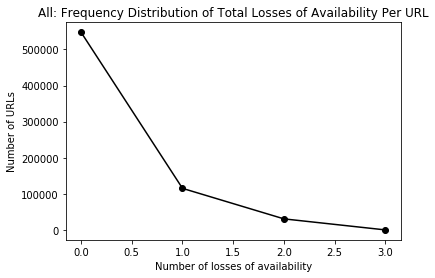

In [1532]:
figureTitle = observatoryName + ": Frequency Distribution of Total Losses of Availability Per URL"
outputFile = outputPath + "url-break-freq-dist.png"

plt.plot(breakCountFrequencies[0], breakCountFrequencies[1], "-o", color="black");
plt.xlabel("Number of losses of availability");
plt.ylabel("Number of URLs");

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

In [1533]:
contentChangeCountFrequencies = np.unique(contentChangeCounts, return_counts=True)
np.save(outputPath + "url-content-change-frequencies.npy", contentChangeCountFrequencies)

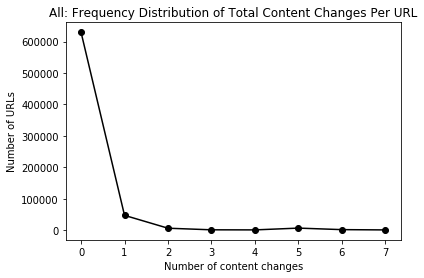

In [1534]:
figureTitle = observatoryName + ": Frequency Distribution of Total Content Changes Per URL"
outputFile = outputPath + "url-content-change-freq-dist.png"

plt.plot(
    contentChangeCountFrequencies[0],
    contentChangeCountFrequencies[1],
    "-o",
    color="black"
);

plt.xlabel("Number of content changes");
plt.ylabel("Number of URLs");

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

In [1535]:
maxCount = max(len(breakCountFrequencies[0]), len(contentChangeCountFrequencies[0]))

frequencies_df = pd.DataFrame(
    columns=["Unresolvable", "Changed Content"],
    index=range(maxCount),
    data=0
)

for i, numBreaks in enumerate(breakCountFrequencies[0]):
    numUrls = breakCountFrequencies[1][i]
    frequencies_df["Unresolvable"][numBreaks] = numUrls

for i, numChanges in enumerate(contentChangeCountFrequencies[0]):
    numUrls = contentChangeCountFrequencies[1][i]
    frequencies_df["Changed Content"][numChanges] = numUrls

frequencies_df

,Unresolvable,Changed Content
0,547680,629700
1,115160,47041
2,30627,6128
3,44,1048
4,0,787
5,0,6479
6,0,1614
7,0,714


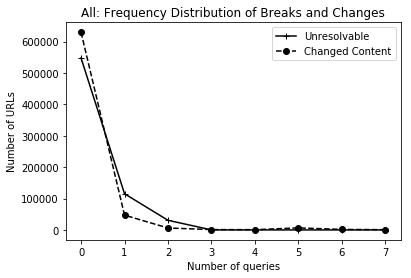

In [1536]:
figureTitle = observatoryName + ": Frequency Distribution of Breaks and Changes"
outputFile = outputPath + "url-behavior-freq-dist"

ax = frequencies_df.plot(
    color="black",
    style=["-+", "--o"],
    legend=False
);

plt.ylabel("Number of URLs");
plt.xlabel("Number of queries");

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

In [1537]:
crawl_totals_df = pd.DataFrame(
    index   = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
)

crawl_totals_df["New URLs"] = crawlUrlTotals
crawl_totals_df["New Contents"] = crawlDatasetTotals
crawl_totals_df["Abandoned"] = crawlAbandonedTotals
crawl_totals_df["First Break"] = crawlFirstBreakTotals
crawl_totals_df["First Change"] = crawlFirstChangeTotals
crawl_totals_df["First Unreliable"] = crawlFirstUnreliableTotals
crawl_totals_df["Total URLs"] = crawl_totals_df["New URLs"].cumsum()
crawl_totals_df["Total Contents"] = crawl_totals_df["New Contents"].cumsum()
crawl_totals_df["Total Abandoned"] = crawl_totals_df["Abandoned"].cumsum()
crawl_totals_df["Total Intermittent"] = crawl_totals_df["First Break"].cumsum()
crawl_totals_df["Total Unstable"] = crawl_totals_df["First Change"].cumsum()
crawl_totals_df["Total Unreliable"] = crawl_totals_df["First Unreliable"].cumsum()
crawl_totals_df["Percent Very Available"] = 1 - crawl_totals_df["Total Intermittent"] / crawl_totals_df["Total URLs"]
crawl_totals_df["Percent Very Stable"] = 1 - crawl_totals_df["Total Unstable"] / crawl_totals_df["Total URLs"]
crawl_totals_df["Percent Very Reliable"] = 1 - crawl_totals_df["Total Unreliable"] / crawl_totals_df["Total URLs"]

crawl_totals_df

,New URLs,New Contents,Abandoned,First Break,First Change,First Unreliable,Total URLs,Total Contents,Total Abandoned,Total Intermittent,Total Unstable,Total Unreliable,Percent Very Available,Percent Very Stable,Percent Very Reliable
2019-03-01 20:37:34.877,16655,15753,0,884,0,884,16655,15753,0,884,0,884,0.946923,1.000000,0.946923
2019-03-13 07:55:12.903,344784,209486,147,4288,0,4288,361439,225239,147,5172,0,5172,0.985691,1.000000,0.985691
2019-03-31 23:33:18.478,35494,22313,26651,15202,1829,17031,396933,247552,26798,20374,1829,22203,0.948671,0.995392,0.944064
2019-04-29 19:11:30.720,1181,1095,14721,236,441,677,398114,248647,41519,20610,2270,22880,0.948231,0.994298,0.942529
2019-05-01 03:57:18.530,15536,24565,315,371,7679,8036,413650,273212,41834,20981,9949,30916,0.949278,0.975948,0.925260
2019-05-13 17:10:37.661,242503,226860,201,15460,0,15460,656153,500072,42035,36441,9949,46376,0.944463,0.984837,0.929321
2019-05-14 20:26:29.383,4518,8316,0,7866,6242,14092,660671,508388,42035,44307,16191,60468,0.932936,0.975493,0.908475
2019-06-01 00:36:19.222,0,34,1488,42160,1,42161,660671,508422,43523,86467,16192,102629,0.869122,0.975492,0.844659
2019-06-01 07:32:31.022,0,606,31,2,508,419,660671,509028,43554,86469,16700,103048,0.869119,0.974723,0.844025
2019-06-01 10:43:38.196,756,9903,160,2280,596,2738,661427,518931,43714,88749,17296,105786,0.865822,0.973850,0.840064


In [1538]:
timeFrame = [
    datetime.datetime.strptime(startDate, "%Y-%m-%d"),
    datetime.datetime.strptime(endDate, "%Y-%m-%d")
]

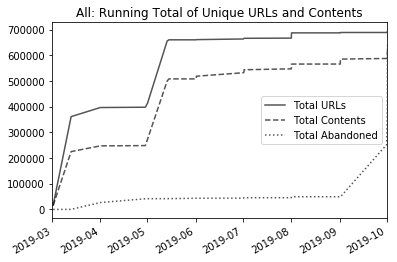

In [1539]:
figureTitle = observatoryName + ": Running Total of Unique URLs and Contents"
outputFile = outputPath + "running-total-urls-and-contents.png"

ax = crawl_totals_df[[
    "Total URLs",
    "Total Contents",
    "Total Abandoned"
]].plot(
    color="black",
    alpha=.67,
    style=["-", "--", ":"],
    legend=False
);

plt.xlim(timeFrame);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

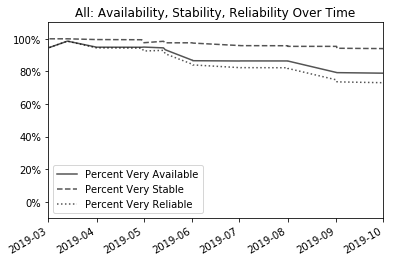

In [1540]:
figureTitle = observatoryName + ": Availability, Stability, Reliability Over Time"
outputFile = outputPath + "reliability-over-time.png"

ax = crawl_totals_df[[
    "Percent Very Available",
    "Percent Very Stable",
    "Percent Very Reliable"
]].plot(
    color="black",
    alpha=.67, # Make it easier to see overlap
    style=["-", "--", ":"],
    legend=False
);

plt.xlim(timeFrame);
plt.ylim([-.1, 1.1]);
ax.set_yticklabels(["{:.0%}".format(float(tick)) for tick in plt.yticks()[0]]);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);